Joseph Nebres

Life Insurance Underwriting

In [1]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier



## Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

c:\Users\Joseph Nebres\anaconda3\envs\dojo-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQjrqP-rni9ezWD60lZS4QJWiQWO8Fu69iOQnBVs9nGosi6aD30PfoXYJBCrA-LIJ5Ek_giJQUf5OdG/pub?gid=517654057&single=true&output=csv')
df.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

 Kaggle Competition: https://www.kaggle.com/competitions/prudential-life-insurance-assessment/data


## Data Exploration





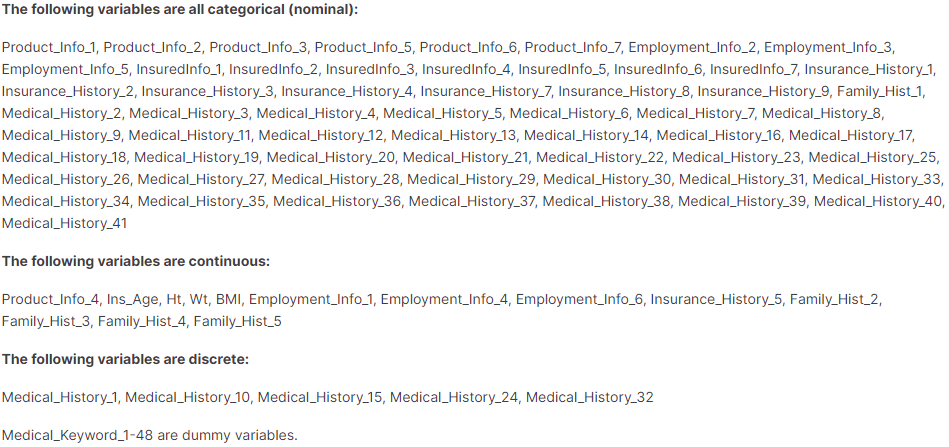

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    Id                   59381 non-null  int64  
 1    Product_Info_1       59381 non-null  int64  
 2    Product_Info_2       59381 non-null  object 
 3    Product_Info_3       59381 non-null  int64  
 4    Product_Info_4       59381 non-null  float64
 5    Product_Info_5       59381 non-null  int64  
 6    Product_Info_6       59381 non-null  int64  
 7    Product_Info_7       59381 non-null  int64  
 8    Ins_Age              59381 non-null  float64
 9    Ht                   59381 non-null  float64
 10   Wt                   59381 non-null  float64
 11   BMI                  59381 non-null  float64
 12   Employment_Info_1    59362 non-null  float64
 13   Employment_Info_2    59381 non-null  int64  
 14   Employment_Info_3    59381 non-null  int64  
 15   Employment_Info_4

We see that there are more than the suggested 25 features, therefore we will choose which columns to highlight what we know about data cleaning and machine learning for this particular project. I will choose the columns that I believe are the best to show my skill set as a data scientist. In this case, I will choose the object feature 'Product_Info_2' and the customer's height and weight. In insurance, high and weight are important in determining someone's premium and if they are approved for a certain policy, as well as there  health rating. I also included at least one column from each category to make the problem more interesting. I chose the columns with missing data to show my process of data cleaning. Again, the 'Response' is the target we are trying to predict. Also, from the data dictionary, the columns 'Medical_Keyword' are dummy values, so we will drop these as well. 

In [4]:
df.shape

(59381, 128)

In [5]:
df = df[['Id', 'Product_Info_1','Product_Info_2','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7',
         'Ins_Age','Ht','Wt','BMI','Employment_Info_4', 'Employment_Info_6', 'InsuredInfo_1', 'Insurance_History_1', 'Insurance_History_5',
         'Family_Hist_1','Family_Hist_2','Family_Hist_3', 'Family_Hist_4','Family_Hist_5','Medical_History_1','Medical_History_2','Medical_History_10',
         'Medical_History_15','Medical_History_24','Medical_History_32','Response']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_2       59381 non-null  object 
 3   Product_Info_3       59381 non-null  int64  
 4   Product_Info_4       59381 non-null  float64
 5   Product_Info_5       59381 non-null  int64  
 6   Product_Info_6       59381 non-null  int64  
 7   Product_Info_7       59381 non-null  int64  
 8   Ins_Age              59381 non-null  float64
 9   Ht                   59381 non-null  float64
 10  Wt                   59381 non-null  float64
 11  BMI                  59381 non-null  float64
 12  Employment_Info_4    52602 non-null  float64
 13  Employment_Info_6    48527 non-null  float64
 14  InsuredInfo_1        59381 non-null  int64  
 15  Insurance_History_1  59381 non-null 

In [7]:
df.shape

(59381, 29)

We have narrowed the data features to 28, but will lower that number here soon since some features are missing too much data to account for in our modeling. 

## Data Cleaning

We see that the columns 'Family_Hist_3','Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24', and 'Medical_History_32' are all missing more than 50% of data, therefore will drop these columns. 

In [8]:
df.drop(columns = ['Family_Hist_3','Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24', 'Medical_History_32'], inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_2       59381 non-null  object 
 3   Product_Info_3       59381 non-null  int64  
 4   Product_Info_4       59381 non-null  float64
 5   Product_Info_5       59381 non-null  int64  
 6   Product_Info_6       59381 non-null  int64  
 7   Product_Info_7       59381 non-null  int64  
 8   Ins_Age              59381 non-null  float64
 9   Ht                   59381 non-null  float64
 10  Wt                   59381 non-null  float64
 11  BMI                  59381 non-null  float64
 12  Employment_Info_4    52602 non-null  float64
 13  Employment_Info_6    48527 non-null  float64
 14  InsuredInfo_1        59381 non-null  int64  
 15  Insurance_History_1  59381 non-null 

In [11]:
df['Id'].value_counts().sum()

59381

The 'Id' column will not help us for predictions, so we will drop the column.

In [12]:
df.drop(columns='Id', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59381 non-null  int64  
 1   Product_Info_2       59381 non-null  object 
 2   Product_Info_3       59381 non-null  int64  
 3   Product_Info_4       59381 non-null  float64
 4   Product_Info_5       59381 non-null  int64  
 5   Product_Info_6       59381 non-null  int64  
 6   Product_Info_7       59381 non-null  int64  
 7   Ins_Age              59381 non-null  float64
 8   Ht                   59381 non-null  float64
 9   Wt                   59381 non-null  float64
 10  BMI                  59381 non-null  float64
 11  Employment_Info_4    52602 non-null  float64
 12  Employment_Info_6    48527 non-null  float64
 13  InsuredInfo_1        59381 non-null  int64  
 14  Insurance_History_1  59381 non-null  int64  
 15  Insurance_History_5  33985 non-null 

In [14]:
df.isna().sum()

Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_4       6779
Employment_Info_6      10854
InsuredInfo_1              0
Insurance_History_1        0
Insurance_History_5    25396
Family_Hist_1              0
Family_Hist_2          28656
Family_Hist_4          19184
Medical_History_1       8889
Medical_History_2          0
Response                   0
dtype: int64

We see that there are 6 columns missing data, we will deal with this during our data preprocessing. We will not deal with this now, since we do not want data leakage. 

In [15]:
df['Product_Info_1'].describe()

count    59381.000000
mean         1.026355
std          0.160191
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Product_Info_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical. 

In [16]:
df['Product_Info_1'] = df['Product_Info_1'].astype(object)

In [17]:
df['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

Without much context on what these values mean,this data looks normal, no inconsistencies. 

In [18]:
df['Product_Info_3'].describe()

count    59381.000000
mean        24.415655
std          5.072885
min          1.000000
25%         26.000000
50%         26.000000
75%         26.000000
max         38.000000
Name: Product_Info_3, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical. 

In [19]:
df['Product_Info_3'] = df['Product_Info_3'].astype(object)

In [20]:
df['Product_Info_4'].describe()

count    59381.000000
mean         0.328952
std          0.282562
min          0.000000
25%          0.076923
50%          0.230769
75%          0.487179
max          1.000000
Name: Product_Info_4, dtype: float64

This data looks normal, no large outliers.


In [21]:
df['Product_Info_5'].describe()

count    59381.000000
mean         2.006955
std          0.083107
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Product_Info_5, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [22]:
df['Product_Info_5'] = df['Product_Info_5'].astype(object)

In [23]:
df['Product_Info_6'].describe()

count    59381.000000
mean         2.673599
std          0.739103
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Product_Info_6, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.



In [24]:
df['Product_Info_6'] = df['Product_Info_6'].astype(object)

In [25]:
df['Product_Info_7'].describe()

count    59381.000000
mean         1.043583
std          0.291949
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Product_Info_7, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.



In [26]:
df['Product_Info_7'] = df['Product_Info_7'].astype(object)

In [27]:
df['Ins_Age'].describe()

count    59381.000000
mean         0.405567
std          0.197190
min          0.000000
25%          0.238806
50%          0.402985
75%          0.567164
max          1.000000
Name: Ins_Age, dtype: float64

Since Ins_age from the data dictionary says that age is Normalized, it makes sense that the max age is 100. We will try to see where the 0 age is coming from, since we should be able to apply for insurance is a person is 0 years old. 

In [28]:
age_filter = df['Ins_Age'] <= 0
df[age_filter]

Product_Info_1 Product_Info_2 Product_Info_3  Product_Info_4  \
197                1             D1             26        0.076923   
431                1             A1             37        0.230769   
502                1             A1             26        0.179487   
558                1             E1             26        1.000000   
576                1             D4             26        0.076923   
...              ...            ...            ...             ...   
58549              1             A1             31        0.076923   
58617              1             A8             26        0.025641   
58618              1             D4             26        0.076923   
58836              2             E1             31        0.230769   
58849              1             A7             15        0.000000   

      Product_Info_5 Product_Info_6 Product_Info_7  Ins_Age        Ht  \
197                2              3              1      0.0  0.636364   
431                2              3              1      0.0  0.636364   
502                2              3              1      0.0  0.672727   
558                2              3              1      0.0  0.600000   
576                2              1              1      0.0  0.600000   
...              ...            ...            ...      ...       ...   
58549              2              3              1      0.0  0.727273   
58617              2              3              1      0.0  0.781818   
58618              2              3              1      0.0  0.636364   
58836              2              3              1      0.0  0.727273   
58849              2              3              1      0.0  0.618182   

             Wt  ...  Employment_Info_6  InsuredInfo_1  Insurance_History_1  \
197    0.184100  ...             0.0000              1                    2   
431    0.320084  ...                NaN              1                    2   
502    0.299163  ...             0.0000              1                    2   
558    0.165272  ...             0.0000              1                    2   
576    0.257322  ...                NaN              1                    2   
...         ...  ...                ...            ...                  ...   
58549  0.205021  ...                NaN              1                    2   
58617  0.267782  ...             0.0030              1                    2   
58618  0.225941  ...             0.0005              1                    2   
58836  0.267782  ...                NaN              1                    2   
58849  0.184100  ...                NaN              1                    2   

       Insurance_History_5  Family_Hist_1  Family_Hist_2  Family_Hist_4  \
197                    NaN              3       0.159420       0.112676   
431                    NaN              2       0.130435            NaN   
502                    NaN              2       0.173913       0.126761   
558                    NaN              2       0.231884       0.211268   
576                    NaN              3       0.130435       0.126761   
...                    ...            ...            ...            ...   
58549                  NaN              3       0.376812       0.239437   
58617                  NaN              3            NaN       0.309859   
58618             0.000013              3       0.246377       0.225352   
58836                  NaN              3       0.275362       0.239437   
58849                  NaN              2       0.188406       0.126761   

       Medical_History_1  Medical_History_2  Response  
197                 86.0                491         4  
431                  9.0                261         7  
502                 10.0                112         6  
558                  2.0                491         8  
576                  NaN                162         6  
...                  ...                ...       ...  
58549                2.0                261   

We will drop these Age 0 applicants, even with age being normalized, 0 means an unborn person. 

In [29]:
# Indexes 'Ins_Age' that are less than or equal to 0. 
indexAge = df[df['Ins_Age'] <= 0].index

In [30]:
# Dropping 'Ins_Age' that are equal to or less than 0.
df.drop(indexAge, inplace =True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59094 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59094 non-null  object 
 1   Product_Info_2       59094 non-null  object 
 2   Product_Info_3       59094 non-null  object 
 3   Product_Info_4       59094 non-null  float64
 4   Product_Info_5       59094 non-null  object 
 5   Product_Info_6       59094 non-null  object 
 6   Product_Info_7       59094 non-null  object 
 7   Ins_Age              59094 non-null  float64
 8   Ht                   59094 non-null  float64
 9   Wt                   59094 non-null  float64
 10  BMI                  59094 non-null  float64
 11  Employment_Info_4    52324 non-null  float64
 12  Employment_Info_6    48359 non-null  float64
 13  InsuredInfo_1        59094 non-null  int64  
 14  Insurance_History_1  59094 non-null  int64  
 15  Insurance_History_5  33938 non-null 

We see that the rows that have age at 0 or less have been dropped, hence the 59094 rows of data. 

In [32]:
df['Ins_Age'].describe()

count    59094.000000
mean         0.407536
std          0.195627
min          0.014925
25%          0.238806
50%          0.402985
75%          0.567164
max          1.000000
Name: Ins_Age, dtype: float64

We now see that the min Ins_age is at 0.014925. 

In [33]:
df['Ht'].describe()

count    59094.000000
mean         0.707344
std          0.074233
min          0.000000
25%          0.654545
50%          0.709091
75%          0.763636
max          1.000000
Name: Ht, dtype: float64

Like the Ins_Age, 'Ht' is normalized, but the 0 min height still makes no sense, we will drop that too. 

In [34]:
height_filter = df['Ht'] <= 0
df[height_filter]

Product_Info_1 Product_Info_2 Product_Info_3  Product_Info_4  \
36117              1             D2             26        0.179487   

      Product_Info_5 Product_Info_6 Product_Info_7  Ins_Age   Ht        Wt  \
36117              2              1              1  0.58209  0.0  0.372385   

       ...  Employment_Info_6  InsuredInfo_1  Insurance_History_1  \
36117  ...                1.0              1                    2   

       Insurance_History_5  Family_Hist_1  Family_Hist_2  Family_Hist_4  \
36117             0.001667              2            NaN            NaN   

       Medical_History_1  Medical_History_2  Response  
36117                4.0                  3         2  

[1 rows x 22 columns]

In [35]:
# Indexes 'Ht' that are less than or equal to 0. 
indexHeight = df[df['Ht'] <= 0].index

In [36]:
# Dropping 'Ht' that are equal to or less than 0.
df.drop(indexHeight, inplace =True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59093 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59093 non-null  object 
 1   Product_Info_2       59093 non-null  object 
 2   Product_Info_3       59093 non-null  object 
 3   Product_Info_4       59093 non-null  float64
 4   Product_Info_5       59093 non-null  object 
 5   Product_Info_6       59093 non-null  object 
 6   Product_Info_7       59093 non-null  object 
 7   Ins_Age              59093 non-null  float64
 8   Ht                   59093 non-null  float64
 9   Wt                   59093 non-null  float64
 10  BMI                  59093 non-null  float64
 11  Employment_Info_4    52323 non-null  float64
 12  Employment_Info_6    48358 non-null  float64
 13  InsuredInfo_1        59093 non-null  int64  
 14  Insurance_History_1  59093 non-null  int64  
 15  Insurance_History_5  33937 non-null 

We see that there is one less row, so we removed the data that has a height of 0.

In [38]:
df['Ht'].describe()

count    59093.000000
mean         0.707356
std          0.074177
min          0.090909
25%          0.654545
50%          0.709091
75%          0.763636
max          1.000000
Name: Ht, dtype: float64

The min hieght is no longer 0. 

In [39]:
df['Wt'].describe()

count    59093.000000
mean         0.292816
std          0.089011
min          0.000000
25%          0.225941
50%          0.288703
75%          0.347280
max          1.000000
Name: Wt, dtype: float64

Like the Ht, 'Wt' is normalized, but the 0 min weight still makes no sense, we will drop that too. 

In [40]:
weight_filter = df['Wt'] <= 0
df[weight_filter]

Product_Info_1 Product_Info_2 Product_Info_3  Product_Info_4  \
14351              1             E1             37        0.230769   

      Product_Info_5 Product_Info_6 Product_Info_7   Ins_Age   Ht   Wt  ...  \
14351              2              3              1  0.104478  0.6  0.0  ...   

       Employment_Info_6  InsuredInfo_1  Insurance_History_1  \
14351                0.0              3                    2   

       Insurance_History_5  Family_Hist_1  Family_Hist_2  Family_Hist_4  \
14351                  NaN              3       0.289855       0.183099   

       Medical_History_1  Medical_History_2  Response  
14351                NaN                162         8  

[1 rows x 22 columns]

In [41]:
# Indexes 'Wt' that are less than or equal to 0. 
indexWeight = df[df['Wt'] <= 0].index

In [42]:
# Dropping 'Wt' that are equal to or less than 0.
df.drop(indexWeight, inplace =True)

In [43]:
df['Wt'].describe()

count    59092.000000
mean         0.292821
std          0.089003
min          0.058577
25%          0.225941
50%          0.288703
75%          0.347280
max          1.000000
Name: Wt, dtype: float64

We see that there is one less row, so we removed the data that has a height of 0. We also see that the min is no longer 0. 

In [44]:
df['BMI'].describe()

count    59092.000000
mean         0.469801
std          0.122129
min          0.058838
25%          0.386163
50%          0.452515
75%          0.533020
max          1.000000
Name: BMI, dtype: float64

'BMI' all looks normal, no outliers, once again the BMI is normalized. 

In [45]:
df['Employment_Info_4'].describe()

count    52322.000000
mean         0.006311
std          0.032897
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Employment_Info_4, dtype: float64

Without much context on what these values mean,this data looks normal, no inconsistencies. 

In [46]:
df['Employment_Info_6'].describe()

count    48357.000000
mean         0.362651
std          0.349525
min          0.000000
25%          0.060000
50%          0.250000
75%          0.550000
max          1.000000
Name: Employment_Info_6, dtype: float64

Without much context on what these values mean,this data looks normal, no inconsistencies. 



In [47]:
df['InsuredInfo_1'].describe()

count    59092.000000
mean         1.209758
std          0.418090
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [48]:
df['InsuredInfo_1'] = df['InsuredInfo_1'].astype(object)

In [49]:
df['Insurance_History_1'].describe()

count    59092.000000
mean         1.726664
std          0.445676
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Insurance_History_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [50]:
df['Insurance_History_1'] = df['Insurance_History_1'].astype(object)

In [51]:
df['Insurance_History_5'].describe()

count    33937.000000
mean         0.001735
std          0.007343
min          0.000000
25%          0.000400
50%          0.000993
75%          0.002000
max          1.000000
Name: Insurance_History_5, dtype: float64

Without much context on what these values mean,this data looks normal, no inconsistencies. 

In [52]:
df['Family_Hist_1'].describe()

count    59092.000000
mean         2.685135
std          0.483601
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Family_Hist_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [53]:
df['Family_Hist_1'] = df['Family_Hist_1'].astype(object)

In [54]:
df['Family_Hist_2'].describe()

count    30481.000000
mean         0.476568
std          0.153717
min          0.028986
25%          0.362319
50%          0.463768
75%          0.579710
max          1.000000
Name: Family_Hist_2, dtype: float64

This data looks normal, no large outliers. 

In [55]:
df['Family_Hist_4'].describe()

count    39925.000000
mean         0.446748
std          0.161857
min          0.000000
25%          0.323944
50%          0.436620
75%          0.563380
max          0.943662
Name: Family_Hist_4, dtype: float64

This data looks normal, no large outliers. 

In [56]:
df['Medical_History_1'].describe()

count    50259.000000
mean         7.957799
std         13.035598
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        240.000000
Name: Medical_History_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [57]:
df['Medical_History_1'] = df['Medical_History_1'].astype(object)

In [58]:
df['Medical_History_2'].describe()

count    59092.000000
mean       253.958218
std        178.641885
min          1.000000
25%        112.000000
50%        162.000000
75%        418.000000
max        648.000000
Name: Medical_History_2, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [59]:
df['Medical_History_2'] = df['Medical_History_2'].astype(object)

In [60]:
df['Response'].describe()

count    59092.000000
mean         5.634299
std          2.457040
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: Response, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [61]:
df['Response'] = df['Response'].astype(object)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59092 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59092 non-null  object 
 1   Product_Info_2       59092 non-null  object 
 2   Product_Info_3       59092 non-null  object 
 3   Product_Info_4       59092 non-null  float64
 4   Product_Info_5       59092 non-null  object 
 5   Product_Info_6       59092 non-null  object 
 6   Product_Info_7       59092 non-null  object 
 7   Ins_Age              59092 non-null  float64
 8   Ht                   59092 non-null  float64
 9   Wt                   59092 non-null  float64
 10  BMI                  59092 non-null  float64
 11  Employment_Info_4    52322 non-null  float64
 12  Employment_Info_6    48357 non-null  float64
 13  InsuredInfo_1        59092 non-null  object 
 14  Insurance_History_1  59092 non-null  object 
 15  Insurance_History_5  33937 non-null 

As we can see, the dtypes from above match with the data dictionary. We will deal with missing values during preprocessing. 

## Exploratory Visualizations


<AxesSubplot: xlabel='Product_Info_1', ylabel='count'>

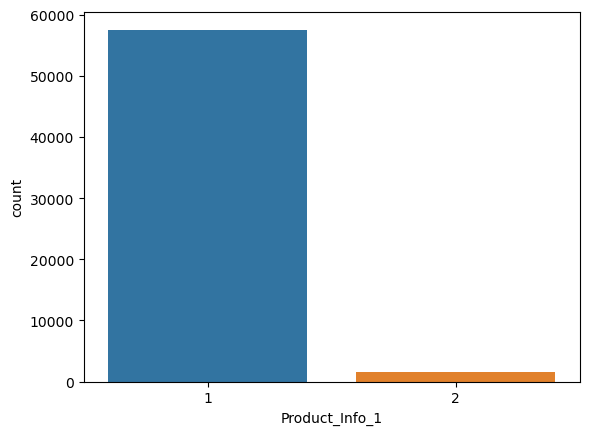

In [63]:
sns.countplot(x=df["Product_Info_1"])

We see that most of the customer's are 1. 

<AxesSubplot: xlabel='Product_Info_2', ylabel='count'>

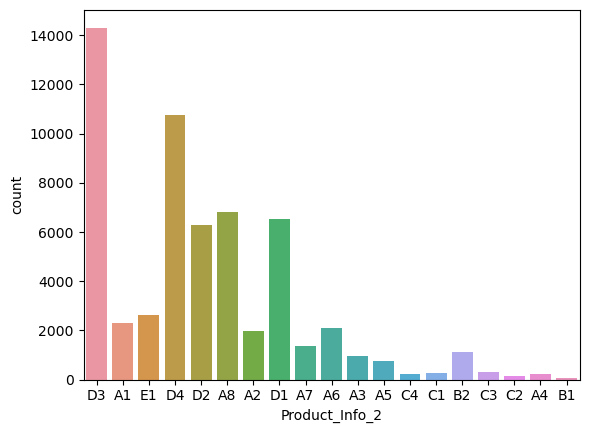

In [64]:
sns.countplot(x=df["Product_Info_2"])

We see that most of the customer's are 1. 

<AxesSubplot: xlabel='Product_Info_3', ylabel='count'>

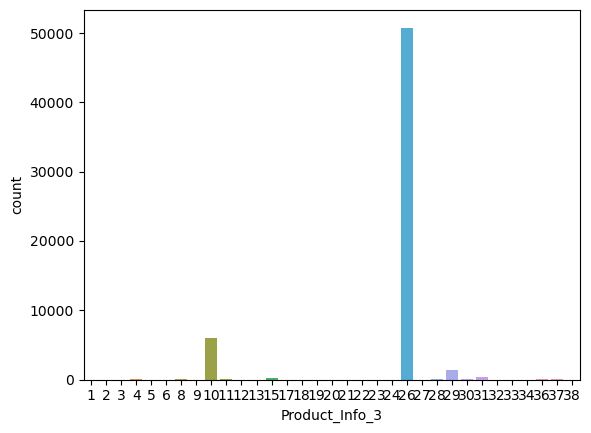

In [65]:
sns.countplot(x=df["Product_Info_3"])

We see that most of the customer's are 62. 

<AxesSubplot: xlabel='Product_Info_4', ylabel='Count'>

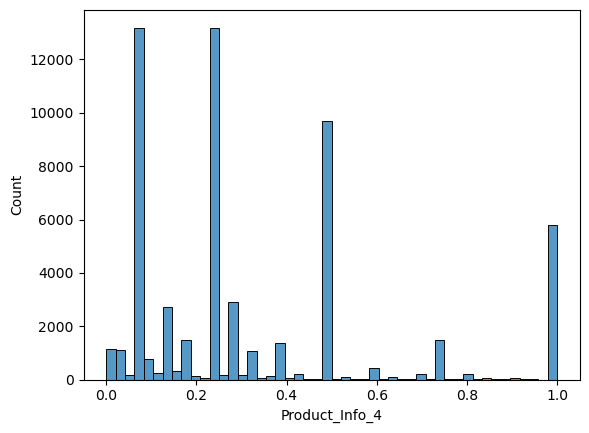

In [66]:
sns.histplot(data=df, x='Product_Info_4')

We see that most of the customers are scattered. 

<AxesSubplot: xlabel='Product_Info_5', ylabel='count'>

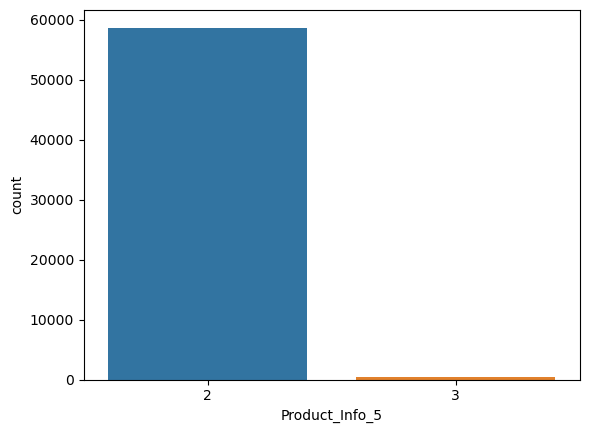

In [67]:
sns.countplot(x=df["Product_Info_5"])

We see that most of the customer's are 2.

<AxesSubplot: xlabel='Product_Info_6', ylabel='count'>

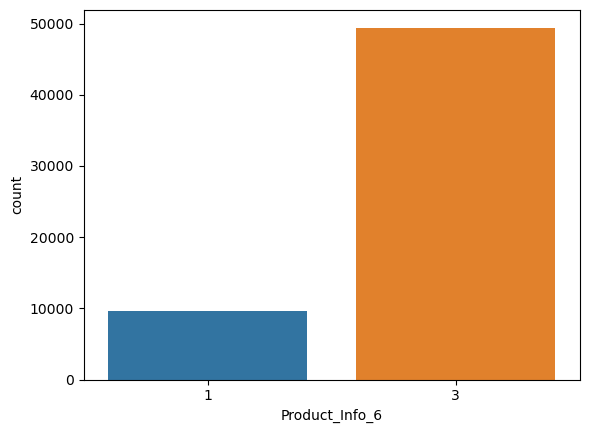

In [68]:
sns.countplot(x=df["Product_Info_6"])

We see that most of the customer's are 3. 

<AxesSubplot: xlabel='Product_Info_7', ylabel='count'>

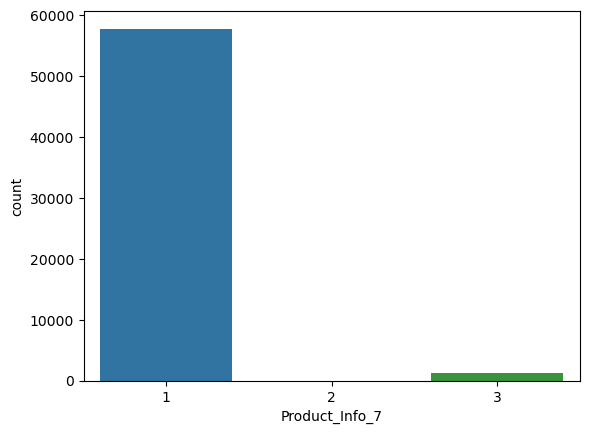

In [69]:
sns.countplot(x=df["Product_Info_7"])

We see that most of the customer's are 1. 

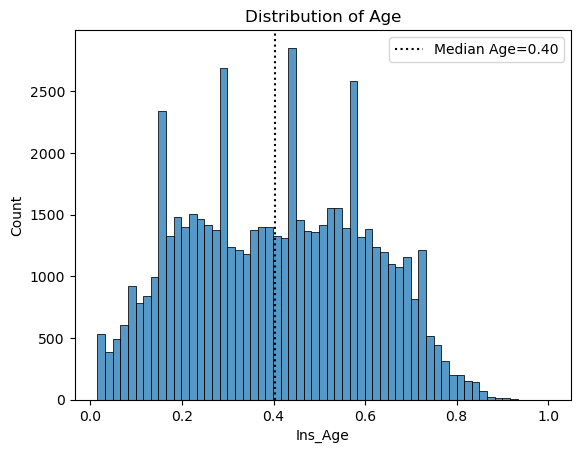

In [70]:
ax = sns.histplot(data=df, x='Ins_Age')

ax.set(title='Distribution of Age')

median = df['Ins_Age'].median()
ax.axvline(median,color='k', ls=':', 
           label=f"Median Age={median:,.2f}");
ax.legend();

We see that most of the customer are distributed evenly from 0.3 to o.7. 

<AxesSubplot: xlabel='Ht', ylabel='Count'>

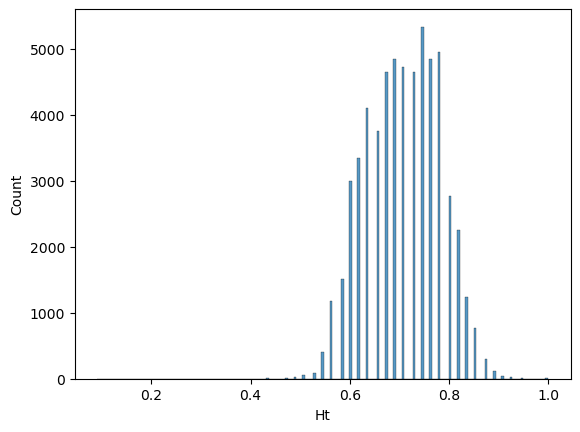

In [71]:
sns.histplot(data=df, x='Ht')

We see that most of the customer are distributed evenly from 0.6 to o.8. 

<AxesSubplot: xlabel='Wt', ylabel='Count'>

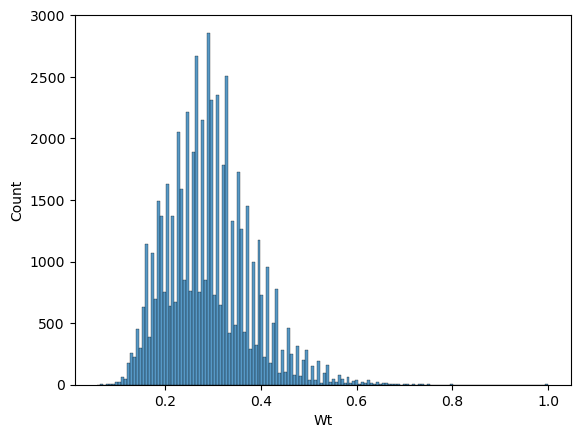

In [72]:
sns.histplot(data=df, x='Wt')

We see that most of the customer are distributed evenly from 0.3 to o.4. 

<AxesSubplot: xlabel='BMI', ylabel='Count'>

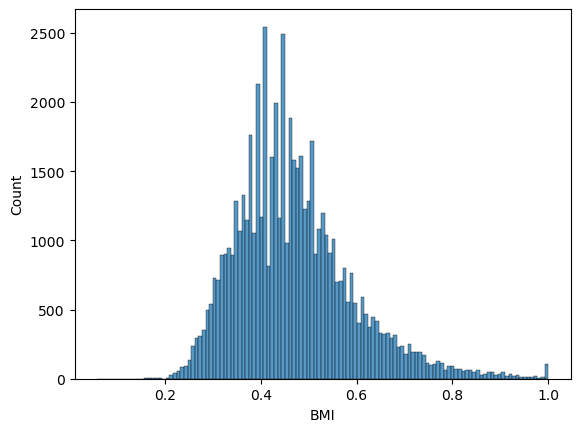

In [73]:
sns.histplot(data=df, x='BMI')

We see that most of the customer are distributed evenly from 0.4 to o.6. 

<AxesSubplot: xlabel='Employment_Info_4', ylabel='Count'>

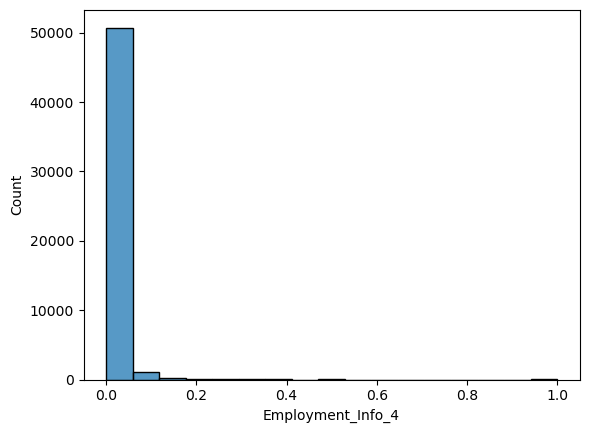

In [74]:
sns.histplot(data=df, x='Employment_Info_4')

We see that most of the customer are near 0. 

<AxesSubplot: xlabel='Employment_Info_6', ylabel='Count'>

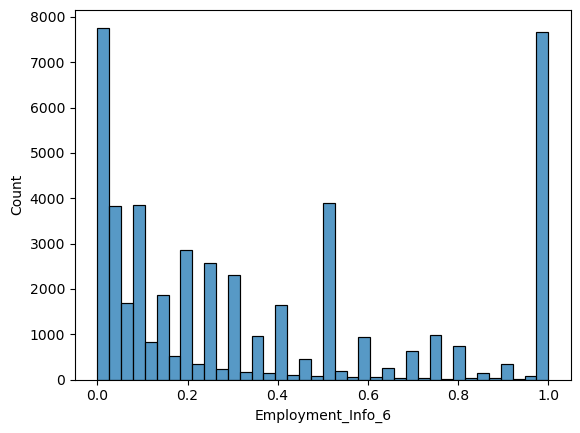

In [75]:
sns.histplot(data=df, x='Employment_Info_6')

We see that most of the customer are distributed randomly.

<AxesSubplot: xlabel='InsuredInfo_1', ylabel='count'>

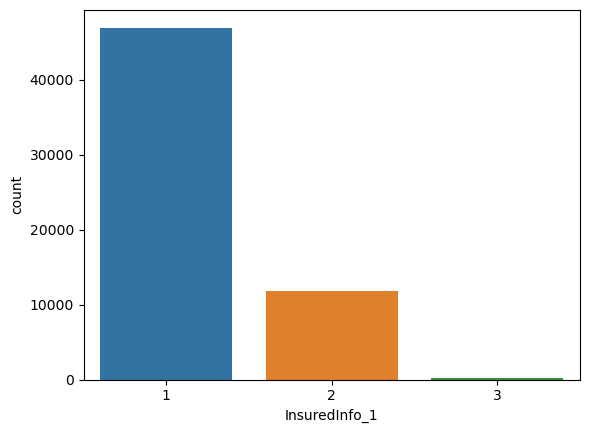

In [76]:
sns.countplot(x=df["InsuredInfo_1"])

We see that most of the customer are 1.


<AxesSubplot: xlabel='Insurance_History_1', ylabel='count'>

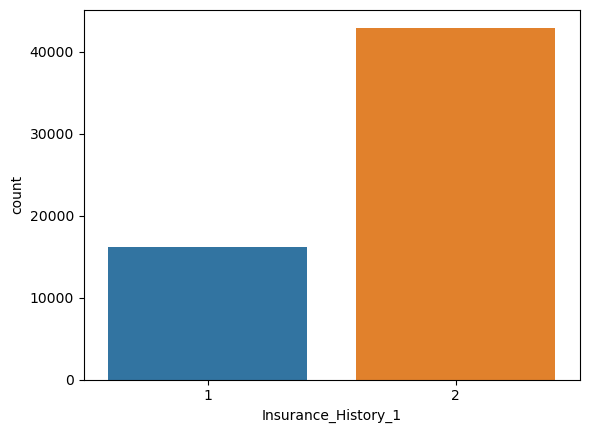

In [77]:
sns.countplot(x=df["Insurance_History_1"])

We see that most of the customer are 2.

<AxesSubplot: xlabel='Insurance_History_5', ylabel='Count'>

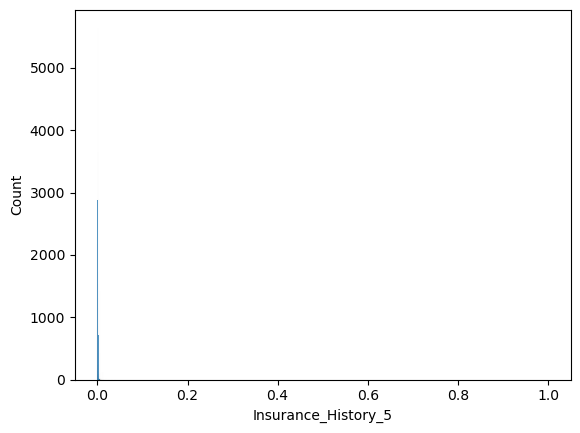

In [78]:
sns.histplot(data=df, x='Insurance_History_5')

In [79]:
df['Insurance_History_5'].value_counts()

0.000667    5331
0.001667    3550
0.003333    2884
0.000333    2486
0.001000    1530
            ... 
0.001001       1
0.000039       1
0.001662       1
0.001287       1
0.001377       1
Name: Insurance_History_5, Length: 2263, dtype: int64

We see that most of the customer are near 0. 

<AxesSubplot: xlabel='Family_Hist_1', ylabel='count'>

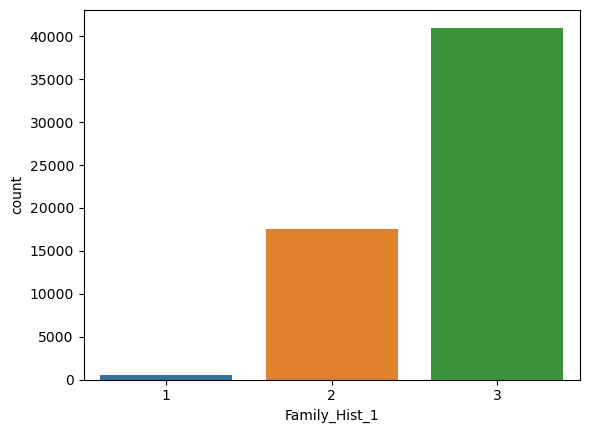

In [80]:
sns.countplot(x=df["Family_Hist_1"])

We see that most of the customer are 3.

<AxesSubplot: xlabel='Family_Hist_2', ylabel='Count'>

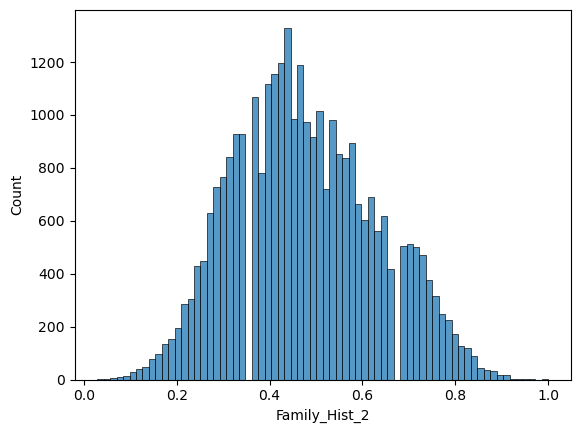

In [81]:
sns.histplot(data=df, x='Family_Hist_2')

We see that most of the customer are distributed from 0.3 to 0.7.





<AxesSubplot: xlabel='Family_Hist_4', ylabel='Count'>

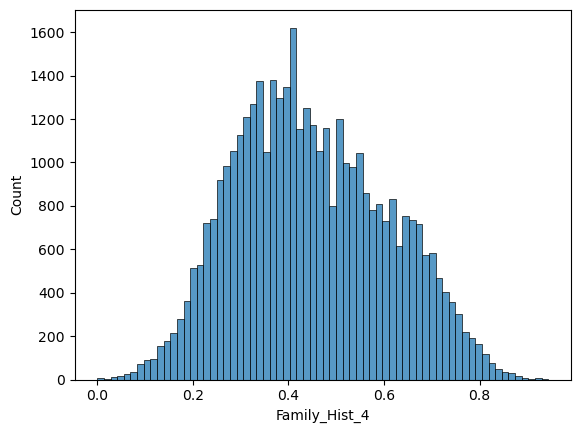

In [82]:
sns.histplot(data=df, x='Family_Hist_4')

We see that most of the customer are distributed from 0.3 to 0.6.


<AxesSubplot: xlabel='Medical_History_1', ylabel='count'>

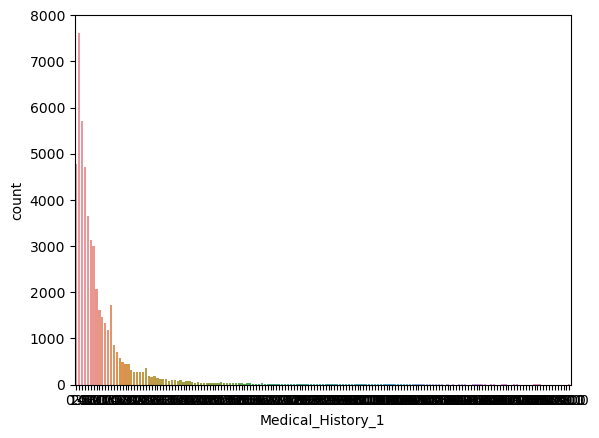

In [83]:
sns.countplot(x=df["Medical_History_1"])

In [84]:
df['Medical_History_1'].value_counts()

1.0      7626
2.0      5708
0.0      4772
3.0      4704
4.0      3651
         ... 
161.0       1
201.0       1
191.0       1
141.0       1
187.0       1
Name: Medical_History_1, Length: 171, dtype: int64

We see that most of the customer are near 1.


<AxesSubplot: xlabel='Medical_History_2', ylabel='count'>

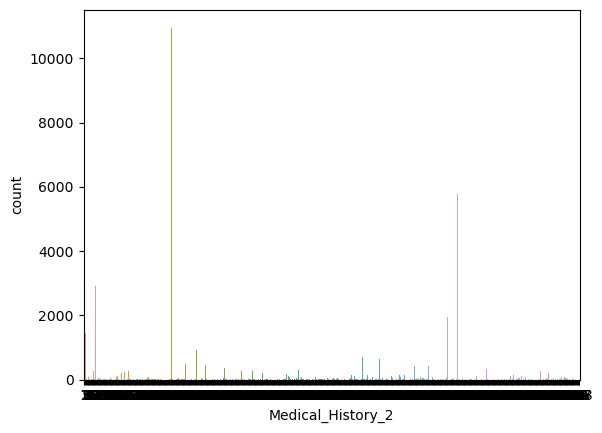

In [85]:
sns.countplot(x=df["Medical_History_2"])

In [86]:
df['Medical_History_2'].value_counts()

112    10959
162     8292
491     5764
335     3022
161     2938
       ...  
210        1
593        1
580        1
321        1
158        1
Name: Medical_History_2, Length: 579, dtype: int64

We see that most of the customer are distributed randomly. 


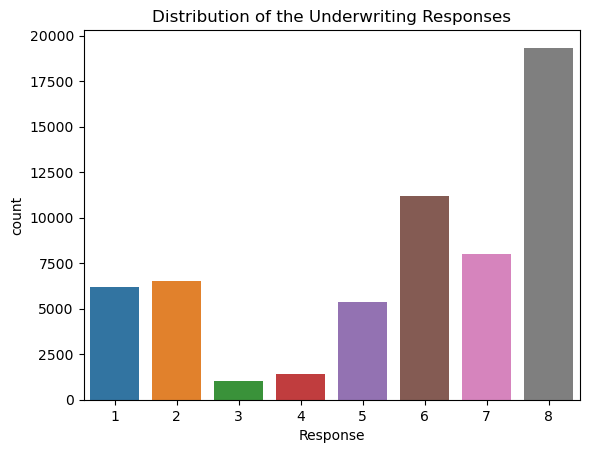

In [87]:
ax2 = sns.countplot(x=df["Response"])

ax2.set(title='Distribution of the Underwriting Responses');



We see that most of the customer are 8. 


In [88]:
corr = df.corr()

C:\Users\Joseph Nebres\AppData\Local\Temp\ipykernel_61536\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


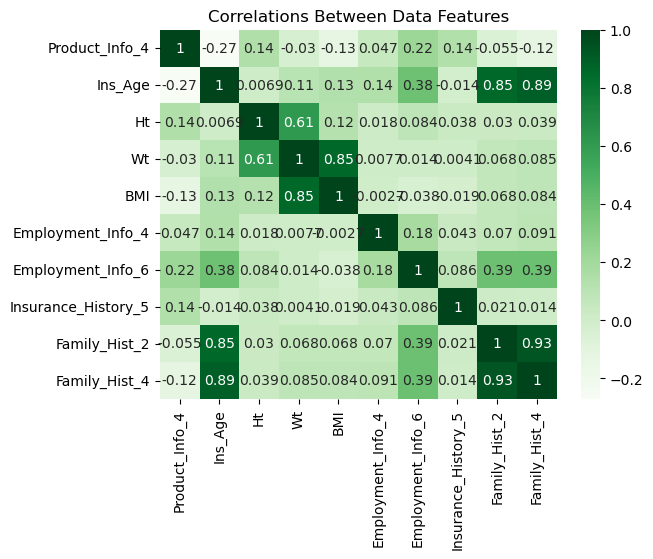

In [89]:
ax3 = sns.heatmap(corr, cmap = 'Greens', annot = True)
ax3.set(title='Correlations Between Data Features');

We see that they are strong correlations with Ins_Age and Family_Hist_2, Ins_age and Family_Hist_4, and Family_Hist_4 and Family_Hist_2. They are moderate correlations between Employment_Info_6 with Family_Hist2 and Family_Hist_4. 

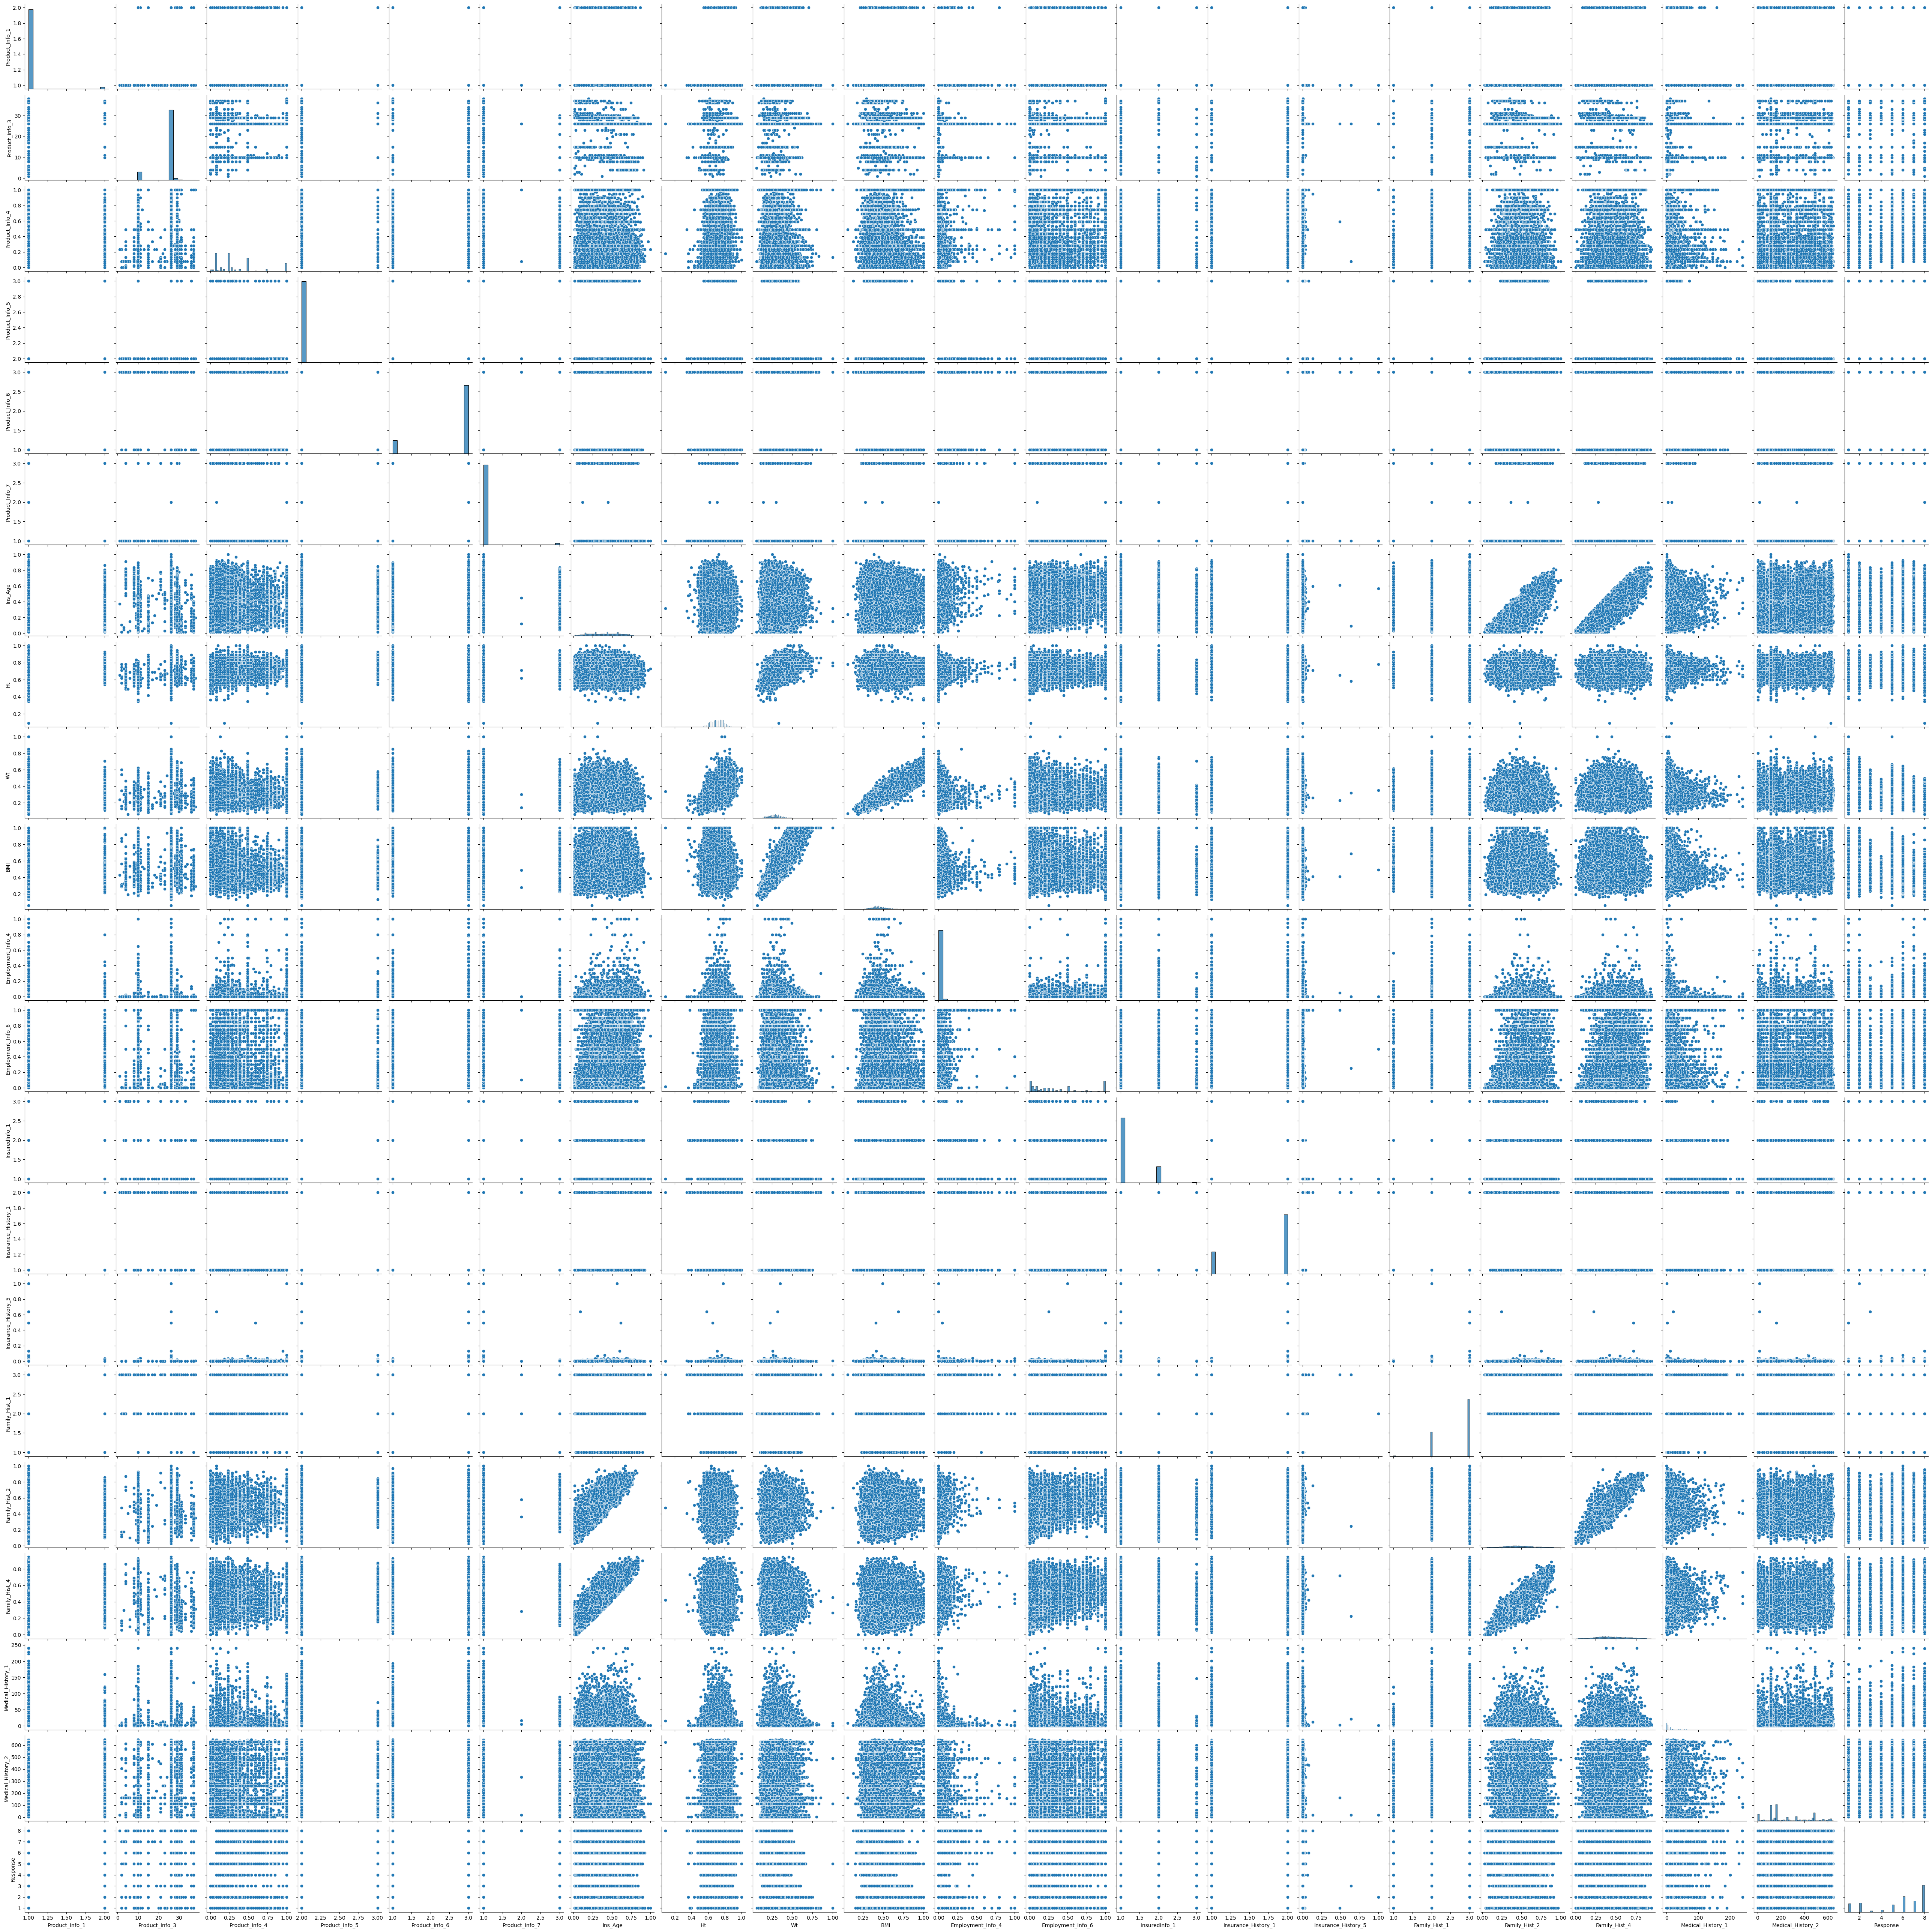

In [90]:
sns.pairplot(df);

## Explanatory Visuals & Analysis

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59092 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59092 non-null  object 
 1   Product_Info_2       59092 non-null  object 
 2   Product_Info_3       59092 non-null  object 
 3   Product_Info_4       59092 non-null  float64
 4   Product_Info_5       59092 non-null  object 
 5   Product_Info_6       59092 non-null  object 
 6   Product_Info_7       59092 non-null  object 
 7   Ins_Age              59092 non-null  float64
 8   Ht                   59092 non-null  float64
 9   Wt                   59092 non-null  float64
 10  BMI                  59092 non-null  float64
 11  Employment_Info_4    52322 non-null  float64
 12  Employment_Info_6    48357 non-null  float64
 13  InsuredInfo_1        59092 non-null  object 
 14  Insurance_History_1  59092 non-null  object 
 15  Insurance_History_5  33937 non-null 

In [92]:
responses = df['Response'].value_counts().sort_values(ascending = False).to_frame()
responses.head()

Response
8     19341
6     11207
7      8011
2      6535
1      6183

As a life insurance agent, I have to underwrite clients to see if they are approved for certain policies, here 'Response' is the risk level a client represents when being assessed for qualifying to get life insurance. The features of this data set help determine a client's risk level or 'Response'. The biggest determining factors for risk is usually a person's health. The healthier the person, the lower the risk. Response or risk in the data set are numbers, but they must be treated as nominal values, since the data dictionary does not list them as having any ordinal relationships. Given this context, we will explore and explain the features that are likely to effect someone's health status, which are height, weight, BMI which is tied to hieght and weight, and as well as age. Also note that the numerical features are normalized when the data set was given to us. 

In [93]:
means2 = df.groupby('Response')['BMI'].mean().sort_values(ascending=False)
means2

Response
5    0.571658
2    0.546924
3    0.516003
1    0.509833
6    0.490737
7    0.464704
4    0.417946
8    0.393944
Name: BMI, dtype: float64

C:\Users\Joseph Nebres\AppData\Local\Temp\ipykernel_61536\414415964.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df,x='Response', y = 'BMI', order = means2.index, ci = None)


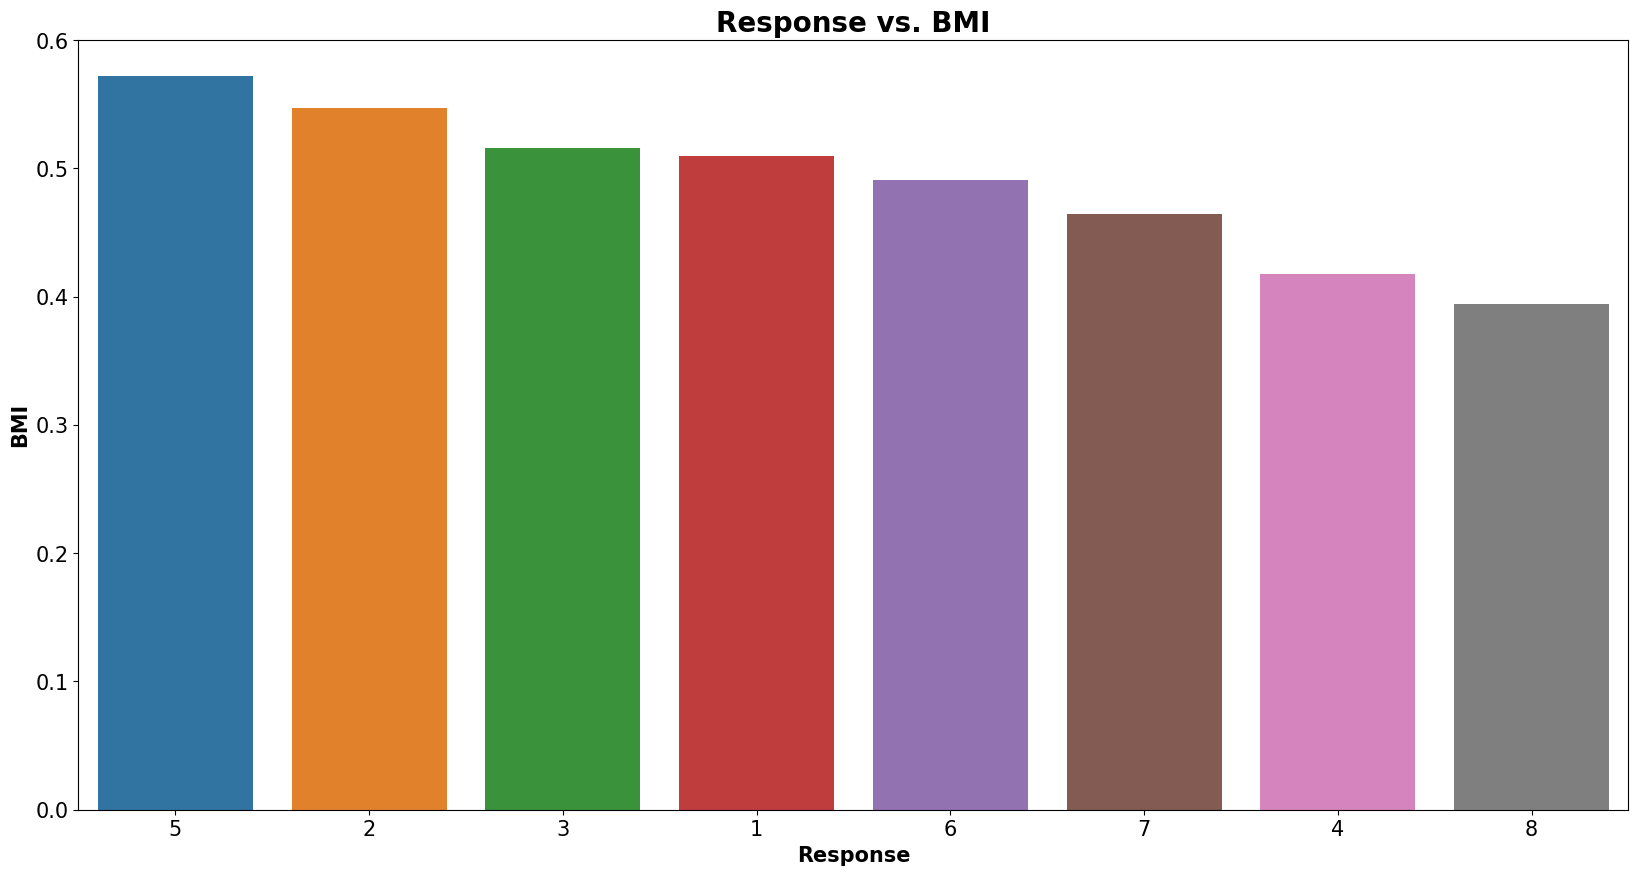

In [94]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Response', y = 'BMI', order = means2.index, ci = None)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.set_title('Response vs. BMI', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Response', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('BMI', fontsize = 15, fontweight = 'bold');

From the figure above, we see that people at Response 5 have the highest average BMI. Generally the higher the BMI, the higher your risk is for health issues. Insurance companies need to collect client's BMI for health risk assessments. 

In [95]:
means = df.groupby('Response')['Wt'].mean().sort_values(ascending=False)
means

Response
5    0.351592
2    0.343356
3    0.323032
1    0.320331
6    0.313185
7    0.291550
4    0.261360
8    0.240037
Name: Wt, dtype: float64

C:\Users\Joseph Nebres\AppData\Local\Temp\ipykernel_61536\650104801.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df,x='Response', y = 'Wt', order = means.index, ci = None)


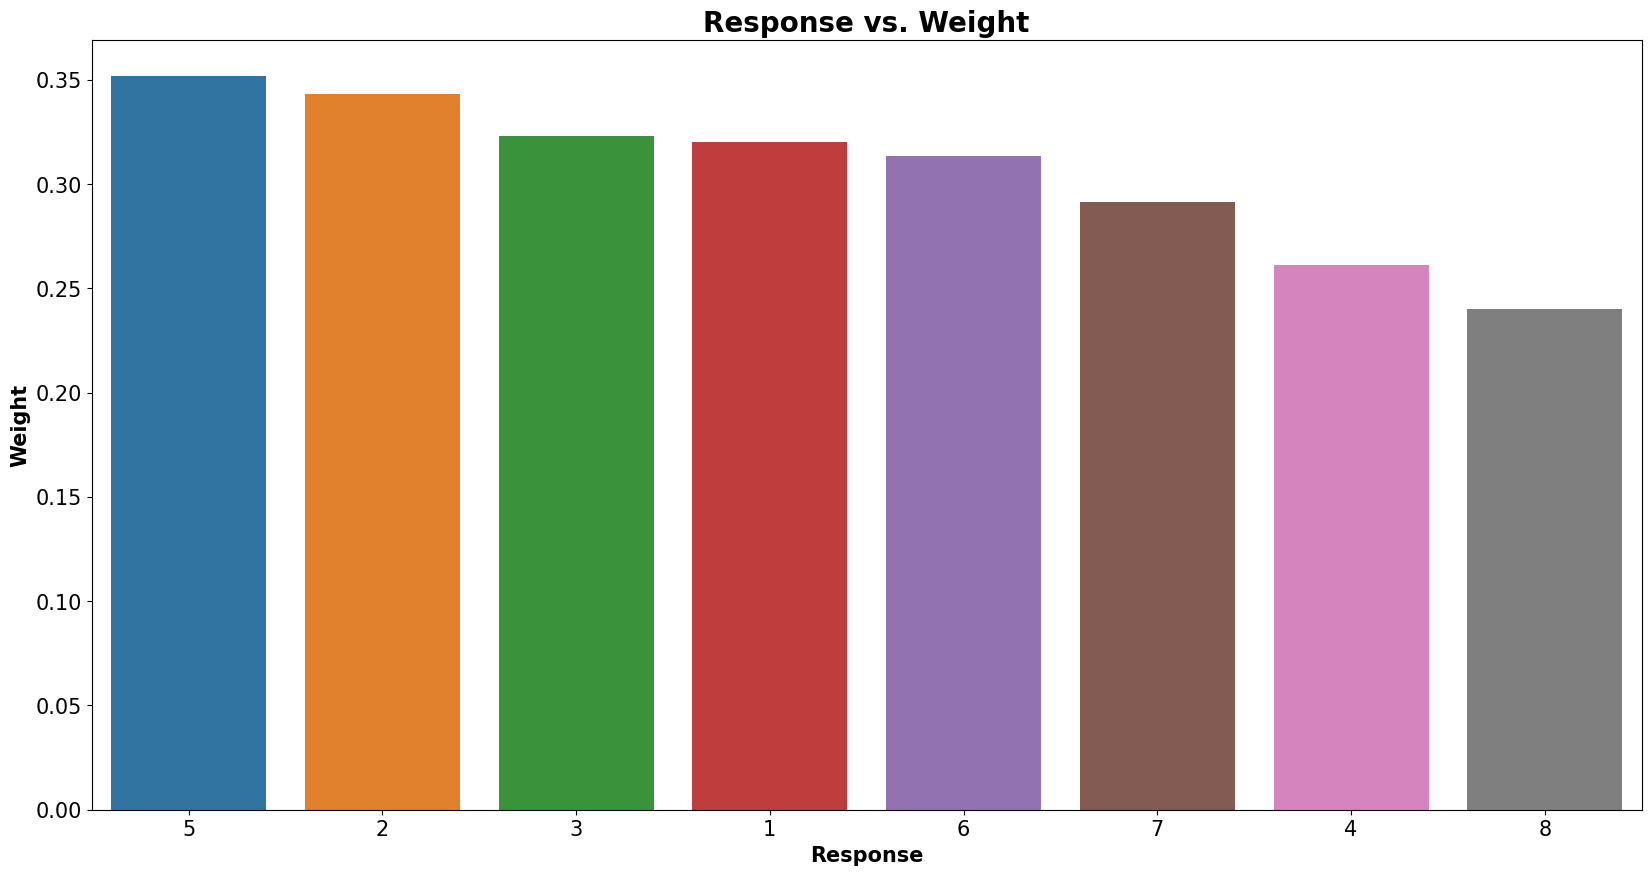

In [96]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Response', y = 'Wt', order = means.index, ci = None)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.set_title('Response vs. Weight', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Response', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Weight', fontsize = 15, fontweight = 'bold');

In the figure above, we see that weight when plotted against Response is in the same order as when being plotted with BMI. This tells us that weight is correlated with BMI, which makes sense since BMI is weight/height. We want to see if the Response lines up for both BMI and average weight. 

In [97]:
means3 = df.groupby('Response')['Ht'].mean().sort_values(ascending=False)
means3

Response
6    0.722055
2    0.716333
3    0.713912
1    0.713714
7    0.711265
5    0.707212
4    0.705772
8    0.691974
Name: Ht, dtype: float64

C:\Users\Joseph Nebres\AppData\Local\Temp\ipykernel_61536\1474109609.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df,x='Response', y = 'Ht', order = means3.index, ci = None)


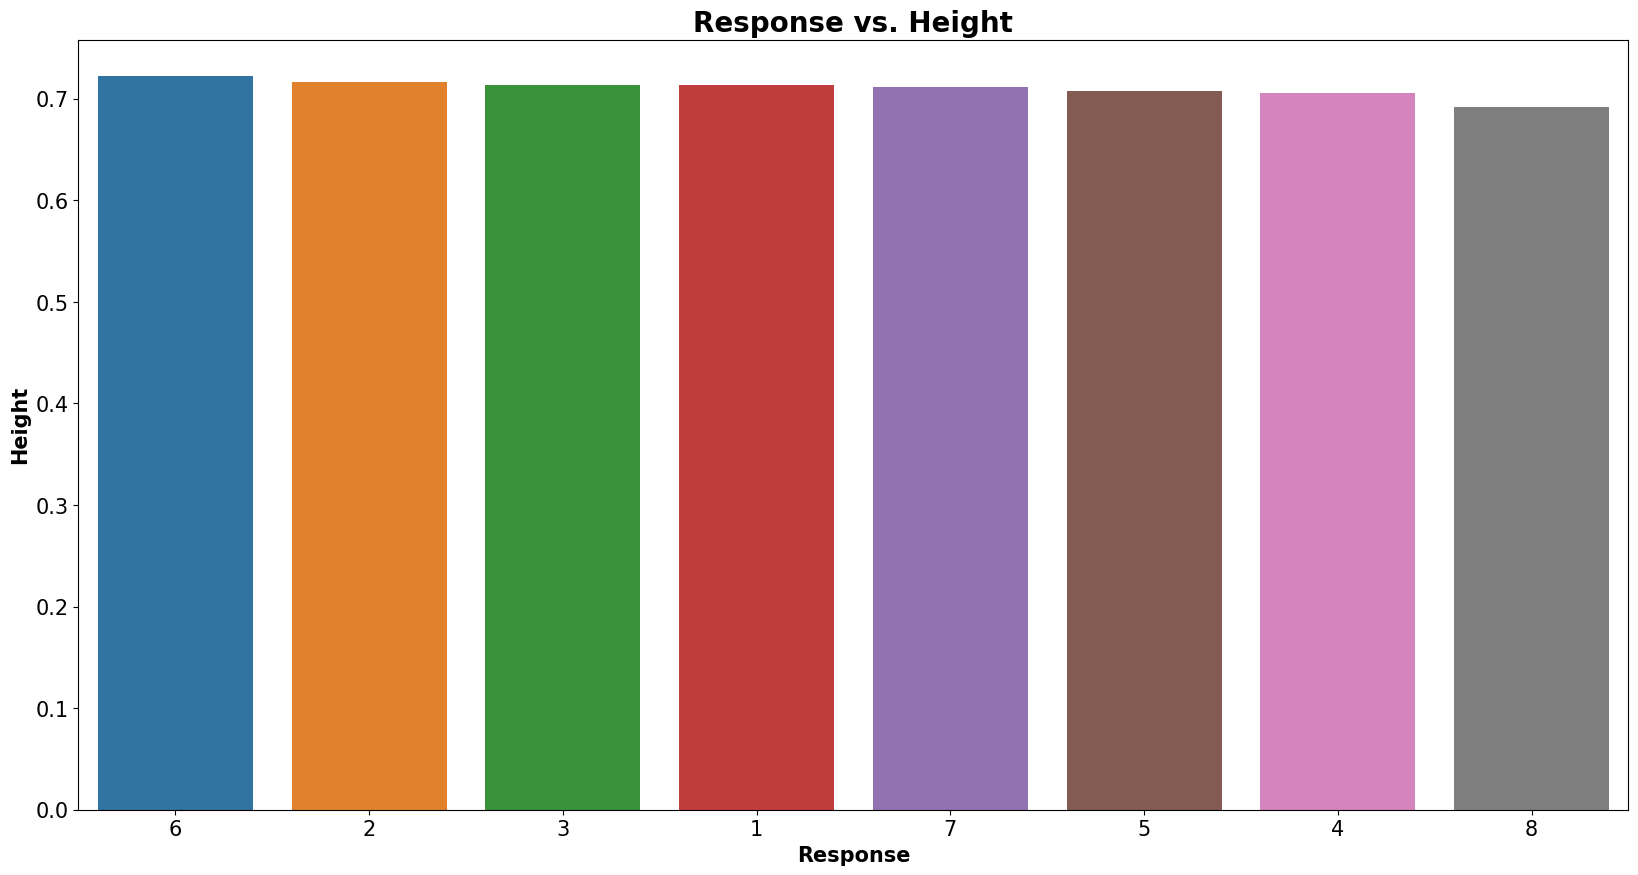

In [98]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Response', y = 'Ht', order = means3.index, ci = None)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.set_title('Response vs. Height', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Response', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Height', fontsize = 15, fontweight = 'bold');

Here we see that hieght and Response have no correlation since the average hieght for all responses are about the same. This figure lines up with our previous two figures that weighta and BMI will effect someone's Response. 

In [99]:
means4 = df.groupby('Response')['Ins_Age'].mean().sort_values(ascending=False)
means4

Response
1    0.494821
2    0.462102
7    0.435327
6    0.427254
5    0.407824
3    0.361618
8    0.345593
4    0.339171
Name: Ins_Age, dtype: float64

C:\Users\Joseph Nebres\AppData\Local\Temp\ipykernel_61536\3687439063.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df,x='Response', y = 'Ins_Age', order = means4.index, ci = None)


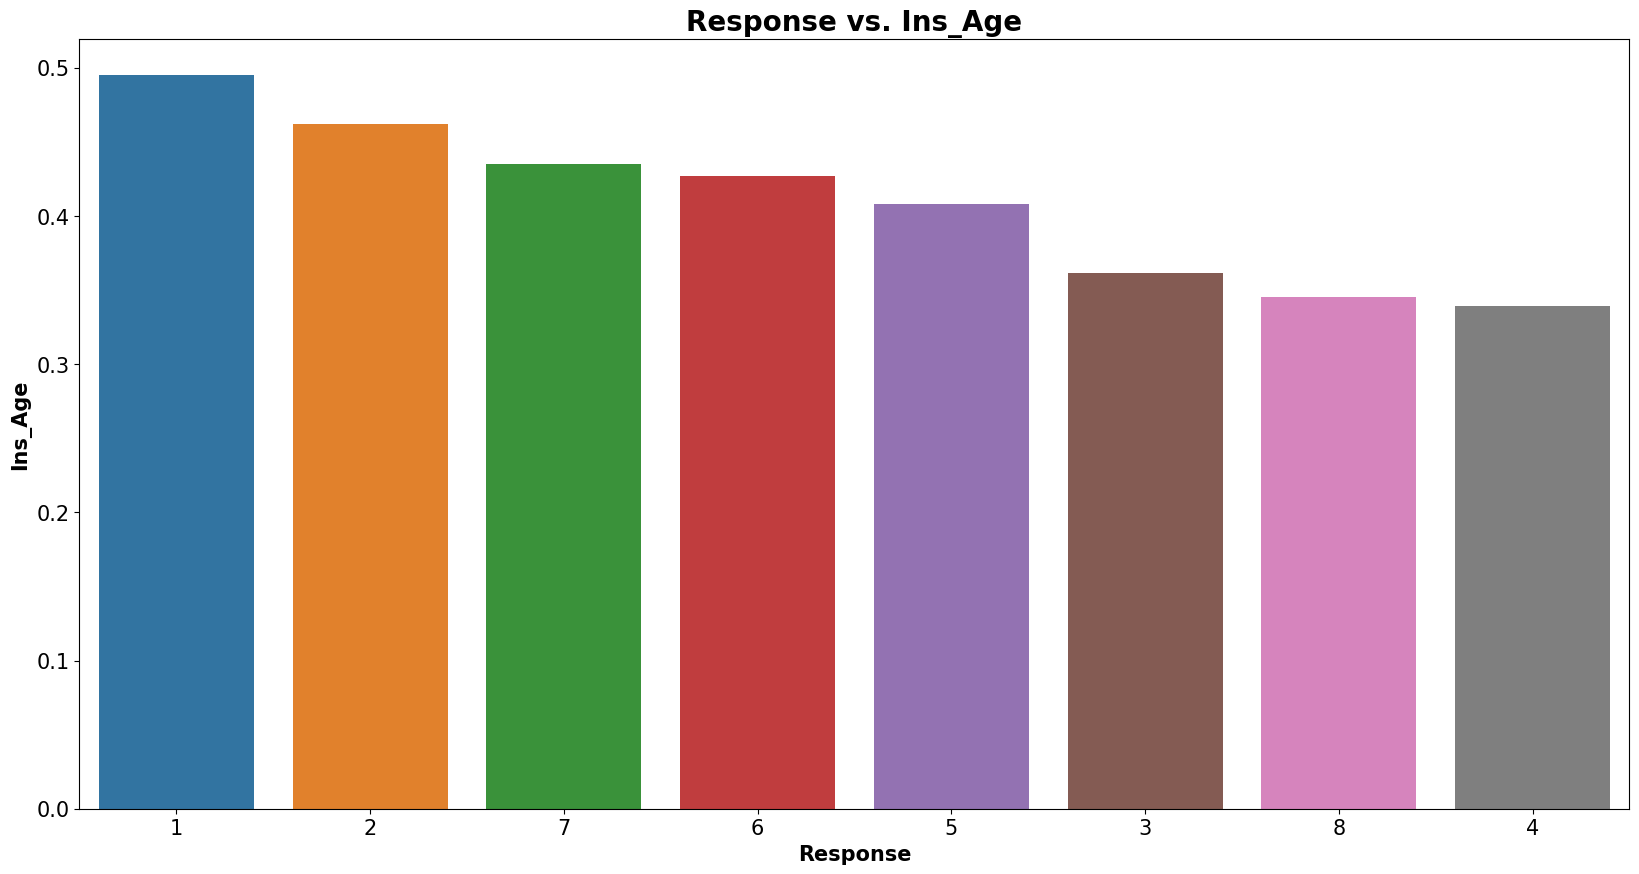

In [100]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Response', y = 'Ins_Age', order = means4.index, ci = None)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.set_title('Response vs. Ins_Age', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Response', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Ins_Age', fontsize = 15, fontweight = 'bold');

Another key to determining someone's health risk or Response is Age. We see that older individuals are in Response 1, and we see that the average age for Response 5 individuals are younger. 

## Key Takeaways

From these figures we find some key points. Both BMI and Age effect someone's grouping in what Response they will recieve. We see this since across the different Response, there are diffences in the averages for both the Age and BMI features. We do not see these differences in the Height feature, since the average hieght accross all of the Responses were fairly similar. 

In conclusion, Age, weight, BMI do effect someone's risk assessment. This does make a lot of sense because people with higher BMI and weight present health risks, since higher BMI and weight are tied to a lot of health issues such as high blood pressure and heart disease. Also, age effects someone's risk assessment because in general, the older someone get, the higher the change they will develope health problems. 

## Model Validation Data Split

In [101]:
ml_df = df.copy()

In [102]:
ml_df.describe()

Product_Info_4       Ins_Age            Ht            Wt           BMI  \
count    59092.000000  59092.000000  59092.000000  59092.000000  59092.000000   
mean         0.329871      0.407539      0.707358      0.292821      0.469801   
std          0.282727      0.195625      0.074176      0.089003      0.122129   
min          0.000000      0.014925      0.090909      0.058577      0.058838   
25%          0.076923      0.238806      0.654545      0.225941      0.386163   
50%          0.230769      0.402985      0.709091      0.288703      0.452515   
75%          0.487179      0.567164      0.763636      0.347280      0.533020   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

       Employment_Info_4  Employment_Info_6  Insurance_History_5  \
count       52322.000000       48357.000000         33937.000000   
mean            0.006311           0.362651             0.001735   
std             0.032897           0.349525             0.007343   
min             0.000000           0.000000             0.000000   
25%             0.000000           0.060000             0.000400   
50%             0.000000           0.250000             0.000993   
75%             0.000000           0.550000             0.002000   
max             1.000000           1.000000             1.000000   

       Family_Hist_2  Family_Hist_4  
count   30481.000000   39925.000000  
mean        0.476568       0.446748  
std         0.153717       0.161857  
min         0.028986       0.000000  
25%         0.362319       0.323944  
50%         0.463768       0.436620  
75%         0.579710       0.563380  
max         1.000000       0.943662

In [103]:
ml_df.head()

Product_Info_1 Product_Info_2 Product_Info_3  Product_Info_4 Product_Info_5  \
0              1             D3             10        0.076923              2   
1              1             A1             26        0.076923              2   
2              1             E1             26        0.076923              2   
3              1             D4             10        0.487179              2   
4              1             D2             26        0.230769              2   

  Product_Info_6 Product_Info_7   Ins_Age        Ht        Wt  ...  \
0              1              1  0.641791  0.581818  0.148536  ...   
1              3              1  0.059701  0.600000  0.131799  ...   
2              3              1  0.029851  0.745455  0.288703  ...   
3              3              1  0.164179  0.672727  0.205021  ...   
4              3              1  0.417910  0.654545  0.234310  ...   

   Employment_Info_6  InsuredInfo_1  Insurance_History_1 Insurance_History_5  \
0                NaN              1                    1            0.000667   
1             0.0018              1                    2            0.000133   
2             0.0300              1                    2                 NaN   
3             0.2000              2                    2                 NaN   
4             0.0500              1                    2                 NaN   

  Family_Hist_1  Family_Hist_2 Family_Hist_4  Medical_History_1  \
0             2            NaN           NaN                4.0   
1             2       0.188406      0.084507                5.0   
2             3       0.304348      0.225352               10.0   
3             3       0.420290      0.352113                0.0   
4             2       0.463768      0.408451                NaN   

   Medical_History_2 Response  
0                112        8  
1                412        4  
2                  3        8  
3                350        8  
4                162        8  

[5 rows x 22 columns]

### **Check Class Balance**

In [104]:
ml_df['Response'].value_counts(normalize=False)

8    19341
6    11207
7     8011
2     6535
1     6183
5     5389
4     1419
3     1007
Name: Response, dtype: int64

### **Split Data**

In [105]:
## Define features (X) and target (y)
target = 'Response'
labels=['No Heart Disease', 'Heart Disease']

X = ml_df.drop(columns = [target], axis=1).copy()
y = ml_df[target].copy()
y=y.astype('int')

In [106]:
## Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [107]:
## Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

8    0.327309
6    0.189648
7    0.135563
2    0.110607
1    0.104628
5    0.091202
4    0.024008
3    0.017036
Name: Response, dtype: float64

In [108]:
## Check how many samples of each class are present for test
y_test.value_counts(normalize=True)

8    0.327286
6    0.189670
7    0.135585
2    0.110539
1    0.104650
5    0.091180
4    0.024030
3    0.017058
Name: Response, dtype: float64

## **Preprocessing for Machine Learning**

In [109]:
## Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [110]:
# Instantiate Transformers.
# Creating 3 types of transformers, with two different types of SimpleImputers. 
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [111]:
# Instantiate numeric pipeline. 
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [112]:
# Instantiate categorical pipeline. 
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [113]:
# Instantiate ColumnTransformer make_column_transformer. 
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = 'drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F5696A0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F6CDF40>)])

In [114]:
# Evaluation function
# This function will show the models accuracy score for reference later.
# Because we don't know which drug is better or which drug has less side effects when taking it, we don't have a preference. 
# This means, for the model's performance, we need the highest possible accuracy. 
def evluate_classification(model,X_train,X_test,y_train,y_test):
    """Uses model.score to display the accuracy scores for training and test splits"""
    print(f"Training Accuracy: {model.score(X_train, y_train)}")
    print(f"Test Accuracy: {model.score(X_test, y_test)}")

## **Models**

In [115]:
## Create an instance of the model
ran_for = RandomForestClassifier(random_state=42)
## Create a model pipeline
ran_for_pipe = make_pipeline(preprocessor, ran_for)
## Fit the model
ran_for_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F5696A0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F6CDF40>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [116]:
# Use a function to evaluate the KNN model's accuracy comparing the training and test sets' model accuracy scores.  
evluate_classification(ran_for_pipe, X_train, X_test, y_train, y_test)

Training Accuracy: 1.0
Test Accuracy: 0.46084072294049955


In [118]:
# Create an instance of a Decision Tree model.
dt = DecisionTreeClassifier(random_state=42)
# Create a model pipeline.
dt_pipe = make_pipeline(preprocessor, dt)

In [119]:
# Fit the DT pipeline. 
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F5696A0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F6CDF40>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [120]:
# Use a function to evaluate the Decision Tree model's accuracy comparing the training and test sets' model accuracy scores.  
evluate_classification(dt_pipe, X_train, X_test, y_train, y_test)

Training Accuracy: 1.0
Test Accuracy: 0.3389291274622622


## **Model Tuning**

In [121]:
# We will try tuning decisiontreeclassifier__min_samples_leaf, decisiontreeclassifier__min_samples_split, decisiontreeclassifier__max_features, decisiontreeclassifier__max_depth.
# Creating a parameter grid with custom tuning values to try to get the model to be more accurate. 
dt_param_grid = {'decisiontreeclassifier__min_samples_leaf': [1,2],
                'decisiontreeclassifier__min_samples_split': [1,2,3],
                'decisiontreeclassifier__max_depth': [9,10,11]}

In [122]:
# Instantiating a gridsearch with the pipeline and parameter grid. 
# Fitting the gridsearch with training data. 
dt_gs = GridSearchCV(dt_pipe, dt_param_grid)
dt_gs.fit(X_train, y_train)

c:\Users\Joseph Nebres\anaconda3\envs\dojo-env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Joseph Nebres\anaconda3\envs\dojo-env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Joseph Nebres\anaconda3\envs\dojo-env\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Joseph Nebres\anaconda3\envs\dojo-env\lib\site-packages\sklearn\tree\_classe

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F5696A0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy=...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F6CDF40>)])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'decisiontreeclassifier__max_depth': [9, 10, 11],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2],
                         'decisiontreeclassifier__min_samples_split': [1, 2,
                                                                       3]})

In [123]:
# Checking if we were able to increase the accuracy of the model with our tuning. Looks like we did not, the default model did better. 
print('Best DT Parameters:')
print(dt_gs.best_params_)
best_dt_pipe = dt_gs.best_estimator_
print(f'Accuracy of best DT model is: {best_dt_pipe.score(X_test, y_test)}')

Best DT Parameters:
{'decisiontreeclassifier__max_depth': 9, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Accuracy of best DT model is: 0.4546131456034658


In [124]:
# We will try tuning randomforestclassifier__n_estimators, randomforestclassifier__max_depth, randomforestclassifier__max_features, randomforestclassifier__min_samples_leaf, randomforestclassifier__criterion.
# Creating a parameter grid with custom tuning values to try to get the model to be more accurate. 
rf_param_grid = {'randomforestclassifier__n_estimators':[7,8,9],
              'randomforestclassifier__max_depth': [7,8,9],
              'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss']}

In [125]:
# Instantiating a gridsearch with the pipeline and parameter grid. 
# Fitting the gridsearch with training data. 
rf_pipe_gs = GridSearchCV(ran_for_pipe, rf_param_grid)
rf_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F5696A0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy=...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F6CDF40>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'randomforestclassifier__max_depth': [7, 8, 9],
                         'randomforestclassifier__n_estimators': [7, 8, 9]})

In [126]:
# Checking if we were able to increase the accuracy of the model with our tuning. Looks like we did not, the default model did better. 
print('Best RF Parameters:')
print(rf_pipe_gs.best_params_)
best_rf_pipe = rf_pipe_gs.best_estimator_
print(f'Accuracy of best RF model is: {best_rf_pipe.score(X_test, y_test)}')

Best RF Parameters:
{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__n_estimators': 8}
Accuracy of best RF model is: 0.39010356731875717


## **Dimensionality Reduction**

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59092 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59092 non-null  object 
 1   Product_Info_2       59092 non-null  object 
 2   Product_Info_3       59092 non-null  object 
 3   Product_Info_4       59092 non-null  float64
 4   Product_Info_5       59092 non-null  object 
 5   Product_Info_6       59092 non-null  object 
 6   Product_Info_7       59092 non-null  object 
 7   Ins_Age              59092 non-null  float64
 8   Ht                   59092 non-null  float64
 9   Wt                   59092 non-null  float64
 10  BMI                  59092 non-null  float64
 11  Employment_Info_4    52322 non-null  float64
 12  Employment_Info_6    48357 non-null  float64
 13  InsuredInfo_1        59092 non-null  object 
 14  Insurance_History_1  59092 non-null  object 
 15  Insurance_History_5  33937 non-null 

We will remove both weight and height, since we have BMI, which tells us more about someone's health and is calculated from both of these data features. 

In [128]:
ml_df.drop(columns = {'Ht', 'Wt'}, axis=1,  inplace = True)


Let's also round off the age to increments of .1 worth of normalized years. 

In [129]:
ml_df['Ins_Age'] = ml_df['Ins_Age'].round(1)
ml_df.head()

Product_Info_1 Product_Info_2 Product_Info_3  Product_Info_4 Product_Info_5  \
0              1             D3             10        0.076923              2   
1              1             A1             26        0.076923              2   
2              1             E1             26        0.076923              2   
3              1             D4             10        0.487179              2   
4              1             D2             26        0.230769              2   

  Product_Info_6 Product_Info_7  Ins_Age       BMI  Employment_Info_4  \
0              1              1      0.6  0.323008                0.0   
1              3              1      0.1  0.272288                0.0   
2              3              1      0.0  0.428780                0.0   
3              3              1      0.2  0.352438                0.0   
4              3              1      0.4  0.424046                0.0   

   Employment_Info_6 InsuredInfo_1 Insurance_History_1  Insurance_History_5  \
0                NaN             1                   1             0.000667   
1             0.0018             1                   2             0.000133   
2             0.0300             1                   2                  NaN   
3             0.2000             2                   2                  NaN   
4             0.0500             1                   2                  NaN   

  Family_Hist_1  Family_Hist_2  Family_Hist_4 Medical_History_1  \
0             2            NaN            NaN               4.0   
1             2       0.188406       0.084507               5.0   
2             3       0.304348       0.225352              10.0   
3             3       0.420290       0.352113               0.0   
4             2       0.463768       0.408451               NaN   

  Medical_History_2 Response  
0               112        8  
1               412        4  
2                 3        8  
3               350        8  
4               162        8

# Feature Engineering

Let's now try with our redefined features. 

In [130]:
## Define features (X) and target (y)
target = 'Response'

X = ml_df.drop(columns = [target], axis=1).copy()
y = ml_df[target].copy()
y=y.astype('int')

In [131]:
# We will try tuning randomforestclassifier__n_estimators, randomforestclassifier__max_depth, randomforestclassifier__max_features, randomforestclassifier__min_samples_leaf, randomforestclassifier__criterion.
# Creating a parameter grid with custom tuning values to try to get the model to be more accurate. 
rf_param_grid = {'randomforestclassifier__n_estimators':[7,8,9],
              'randomforestclassifier__max_depth': [7,8,9],
              'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss']}

In [132]:
# Instantiating a gridsearch with the pipeline and parameter grid. 
# Fitting the gridsearch with training data. 
rf_pipe_gs = GridSearchCV(ran_for_pipe, rf_param_grid)
rf_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F5696A0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy=...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F6CDF40>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'randomforestclassifier__max_depth': [7, 8, 9],
                         'randomforestclassifier__n_estimators': [7, 8, 9]})

In [133]:
# Checking if we were able to increase the accuracy of the model with our tuning. Looks like we did not, the default model did better. 
print('Best RF Parameters:')
print(rf_pipe_gs.best_params_)
best_rf_pipe = rf_pipe_gs.best_estimator_
print(f'Accuracy of best RF model is: {best_rf_pipe.score(X_test, y_test)}')

Best RF Parameters:
{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__n_estimators': 8}
Accuracy of best RF model is: 0.39010356731875717


In [134]:
# We will try tuning decisiontreeclassifier__min_samples_leaf, decisiontreeclassifier__min_samples_split, decisiontreeclassifier__max_features, decisiontreeclassifier__max_depth.
# Creating a parameter grid with custom tuning values to try to get the model to be more accurate. 
dt_param_grid = {'decisiontreeclassifier__min_samples_leaf': [1,2],
                'decisiontreeclassifier__min_samples_split': [1,2,3],
                'decisiontreeclassifier__max_depth': [9,10,11]}

In [135]:
# Instantiating a gridsearch with the pipeline and parameter grid. 
# Fitting the gridsearch with training data. 
dt_gs = GridSearchCV(dt_pipe, dt_param_grid)
dt_gs.fit(X_train, y_train)

c:\Users\Joseph Nebres\anaconda3\envs\dojo-env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Joseph Nebres\anaconda3\envs\dojo-env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Joseph Nebres\anaconda3\envs\dojo-env\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Joseph Nebres\anaconda3\envs\dojo-env\lib\site-packages\sklearn\tree\_classe

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F5696A0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy=...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F6CDF40>)])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'decisiontreeclassifier__max_depth': [9, 10, 11],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2],
                         'decisiontreeclassifier__min_samples_split': [1, 2,
                                                                       3]})

In [136]:
# Checking if we were able to increase the accuracy of the model with our tuning. Looks like we did not, the default model did better. 
print('Best DT Parameters:')
print(dt_gs.best_params_)
best_dt_pipe = dt_gs.best_estimator_
print(f'Accuracy of best DT model is: {best_dt_pipe.score(X_test, y_test)}')

Best DT Parameters:
{'decisiontreeclassifier__max_depth': 9, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Accuracy of best DT model is: 0.4546131456034658


In [137]:
## Create an instance of the model
ran_for = RandomForestClassifier(random_state=42)
## Create a model pipeline
ran_for_pipe = make_pipeline(preprocessor, ran_for)
## Fit the model
ran_for_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F5696A0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F6CDF40>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [138]:
# Use a function to evaluate the KNN model's accuracy comparing the training and test sets' model accuracy scores.  
evluate_classification(ran_for_pipe, X_train, X_test, y_train, y_test)

Training Accuracy: 1.0
Test Accuracy: 0.46084072294049955


In [139]:
# Create an instance of a Decision Tree model.
dt = DecisionTreeClassifier(random_state=42)
# Create a model pipeline.
dt_pipe = make_pipeline(preprocessor, dt)
## Fit the model
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F5696A0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021B7F6CDF40>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [140]:
# Use a function to evaluate the Decision Tree model's accuracy comparing the training and test sets' model accuracy scores.  
evluate_classification(dt_pipe, X_train, X_test, y_train, y_test)


Training Accuracy: 1.0
Test Accuracy: 0.3389291274622622


# **Obervations & Conclusions**

### **Random Forrest Model Observations**

* We see that the tuned random forest model before and after feature engineering had a poor accuracy score of 0.39010356731875717. The only difference observed was that the tuned feature engineered random forest model took 1 min 31.3 sec seconds while the unengineered tuned model took 1 min 31.1 sec. 

* We see that the untuned random forest model before and after feature engineering had a poor accuracy score of 0.46084072294049955. The only difference observed was that the untuned feature engineered random forest model took 1 second longer to execute as compared to the tuned untuned unengineered untuned model, at 15.5 sec and 14.4 sec, respectively.

* In conclusion, the best model to use out of the four random forest models was the unengineered and untuned random forest model since it was the fastest to execute and had the highest accuracy score. 

### **Decision Tree Model Observations**

* We see that the tuned decision tree model before and after feature engineering had a poor accuracy score of 0.4546131456034658. The only difference observed was that the tuned feature engineered decision tree model took 1 min 39.2 seconds while the unengineered tuned model took 1 min 42.7 secs. 

* We see that the untuned decision tree model before and after feature engineering had a poor accuracy score of 0.3389291274622622. They also performed similarily comparing time to execute, were we observed that the untuned feature engineered decision tree model took 2.5 seconds to execute as well as the untuned unengineered untuned model at the same 2.5 seconds.

* In conclusion, the best model to use out of the four decision trees was the feature engineered and tuned decision tree model since it was the fastest to execute and had the highest accuracy score. 